<a href="https://colab.research.google.com/github/VenuKumar1510/VenuKumar1510-Customer-Churn-Analysis/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Dataset loaded successfully!
Shape: (7043, 21)
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport

/tmp/ipython-input-3494442976.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)
/tmp/ipython-input-3494442976.py:69: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


       gender  SeniorCitizen Partner Dependents       tenure PhoneService  \
count    7043    7043.000000    7043       7043  7043.000000         7043   
unique      2            NaN       2          2          NaN            2   
top      Male            NaN      No         No          NaN          Yes   
freq     3555            NaN    3641       4933          NaN         6361   
mean      NaN       0.162147     NaN        NaN    32.371149          NaN   
std       NaN       0.368612     NaN        NaN    24.559481          NaN   
min       NaN       0.000000     NaN        NaN     0.000000          NaN   
25%       NaN       0.000000     NaN        NaN     9.000000          NaN   
50%       NaN       0.000000     NaN        NaN    29.000000          NaN   
75%       NaN       0.000000     NaN        NaN    55.000000          NaN   
max       NaN       1.000000     NaN        NaN    72.000000          NaN   

       MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
co

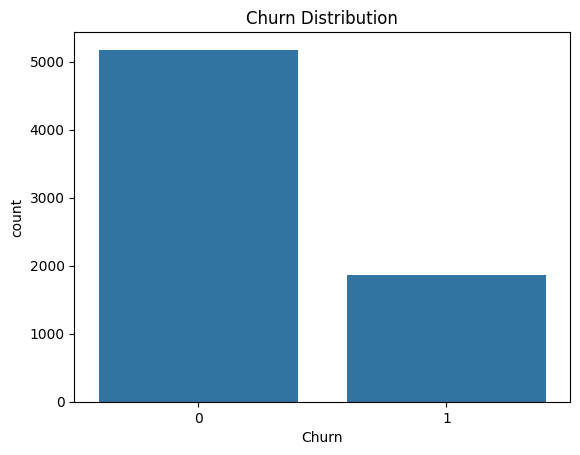

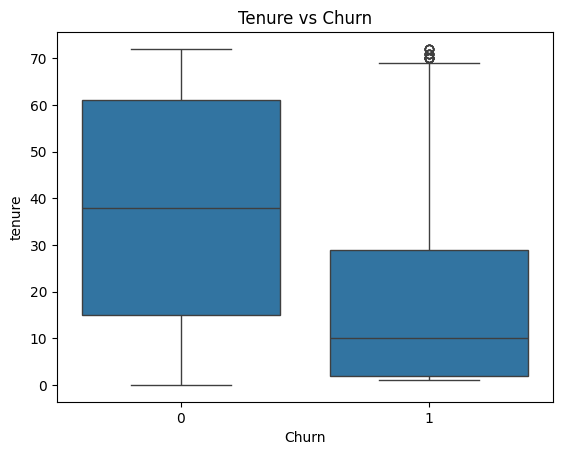

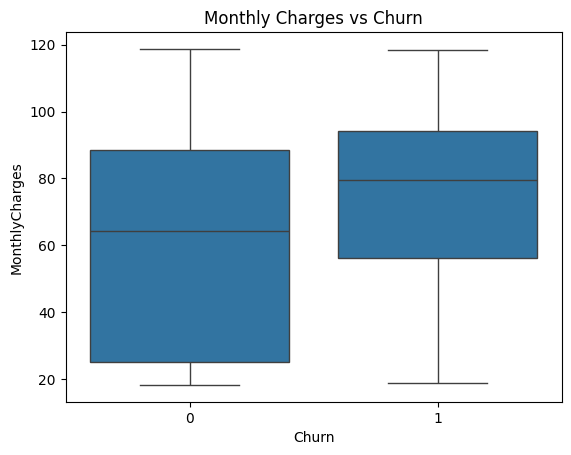

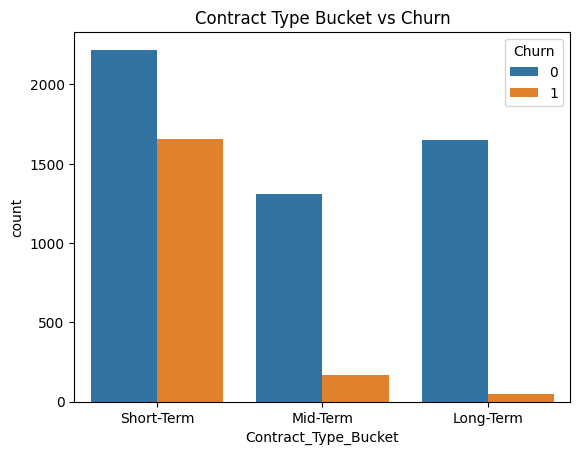

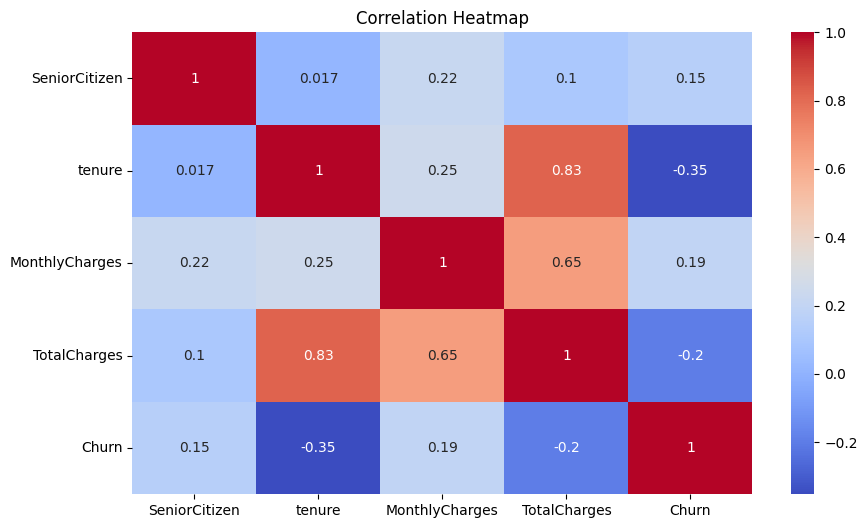


📉 31.84% of churned users were on monthly contracts with <3-month tenure.
💡 Suggestion: Implement early engagement & retention strategies within first 3 months.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



✅ Model Evaluation
Accuracy: 0.8168914123491838

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.67      0.60      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



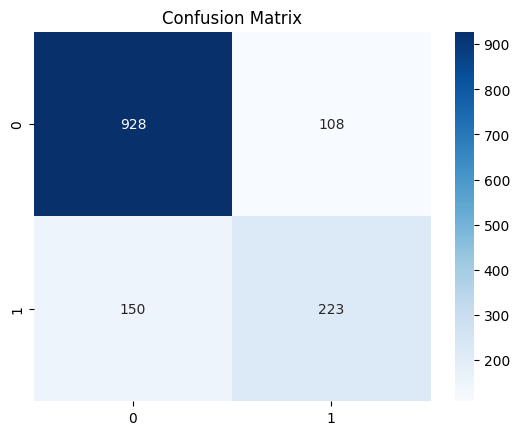

In [1]:
# -----------------------------------------------------------
# 🧠 Customer Churn Analysis — March 2025 to April 2025
# Author: Venu Kumar Goud
# -----------------------------------------------------------

# 1️⃣ Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------------------------------------
# 2️⃣ Load Dataset
# -----------------------------------------------------------
# 🔗 Use your corrected GitHub raw file URL
url = "https://raw.githubusercontent.com/VenuKumar1510/VenuKumar1510-Customer-Churn-Analysis/main/data.csv"

df = pd.read_csv(url)
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print(df.head())

# -----------------------------------------------------------
# 3️⃣ Data Cleaning
# -----------------------------------------------------------
# Replace spaces or missing values in TotalCharges if column exists
if 'TotalCharges' in df.columns:
    df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
    df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Drop CustomerID if present
if 'customerID' in df.columns:
    df.drop('customerID', axis=1, inplace=True)

# -----------------------------------------------------------
# 4️⃣ Feature Engineering
# -----------------------------------------------------------
# Create Tenure Bands
def tenure_band(x):
    if x <= 3:
        return "0-3 months"
    elif x <= 12:
        return "4-12 months"
    elif x <= 24:
        return "1-2 years"
    elif x <= 48:
        return "2-4 years"
    else:
        return "4+ years"

if 'tenure' in df.columns:
    df["Tenure_Band"] = df["tenure"].apply(tenure_band)

# Create Contract Type Buckets (if column exists)
if 'Contract' in df.columns:
    df["Contract_Type_Bucket"] = df["Contract"].replace({
        "Month-to-month": "Short-Term",
        "One year": "Mid-Term",
        "Two year": "Long-Term"
    })

# Encode Churn Column
if 'Churn' in df.columns:
    df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

# -----------------------------------------------------------
# 5️⃣ Exploratory Data Analysis (EDA)
# -----------------------------------------------------------

print("\n📊 Basic Statistics:")
print(df.describe(include='all'))

# 1. Churn Distribution
sns.countplot(data=df, x="Churn")
plt.title("Churn Distribution")
plt.show()

# 2. Tenure vs Churn
if 'tenure' in df.columns:
    sns.boxplot(data=df, x="Churn", y="tenure")
    plt.title("Tenure vs Churn")
    plt.show()

# 3. Monthly Charges vs Churn
if 'MonthlyCharges' in df.columns:
    sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
    plt.title("Monthly Charges vs Churn")
    plt.show()

# 4. Contract Type vs Churn
if 'Contract_Type_Bucket' in df.columns:
    sns.countplot(data=df, x="Contract_Type_Bucket", hue="Churn")
    plt.title("Contract Type Bucket vs Churn")
    plt.show()

# 5. Heatmap for correlations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------------------------------------
# 6️⃣ Churn Insights
# -----------------------------------------------------------
if 'Contract_Type_Bucket' in df.columns and 'tenure' in df.columns:
    churned = df[df["Churn"] == 1]
    total_churned = len(churned)
    short_tenure_monthly = churned[
        (churned["Contract_Type_Bucket"] == "Short-Term") &
        (churned["tenure"] <= 3)
    ]
    if total_churned > 0:
        percentage = len(short_tenure_monthly) / total_churned * 100
        print(f"\n📉 {percentage:.2f}% of churned users were on monthly contracts with <3-month tenure.")
        print("💡 Suggestion: Implement early engagement & retention strategies within first 3 months.")
    else:
        print("\nNo churned users found in dataset.")
else:
    print("\nSkipping churn insight analysis — columns missing.")

# -----------------------------------------------------------
# 7️⃣ Predictive Model (Logistic Regression)
# -----------------------------------------------------------
# Encode all categorical features
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']):
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Check if Churn exists
if 'Churn' in df_encoded.columns:
    X = df_encoded.drop("Churn", axis=1)
    y = df_encoded["Churn"]

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Logistic Regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Evaluation
    print("\n✅ Model Evaluation")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()
else:
    print("\n⚠️ 'Churn' column missing — model training skipped.")
